# Analysis of Utah Air Quality Index
Exploratory analysis of Utah's Air Quality Index. 

# The Data Files
The data was retrieved from EPA.gov using the Daily AQI pre-generated data files. The raw data files can be accessed here: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

The data files are available by year and for this analysis, a separate data file (Daily AQI by CBSA) for the years 1980-2017 were downloaded. 

__Filename Format:__ daily_aqi_by_cbsa_YYYY.zip

__File combining:__ Files were all downloaded to a folder and then combined using awk within a Terminal window

```sh
awk 'FNR==1 && NR>1{next;}{print}' *.csv > aqi.csv
```
The combined file, for all CBSAs, is made available as part of this project.

__Column Headers__
- __CBSA:__ Core Based Statistical Area
- __CBSA Code:__ Core Based Statistical Area Unique Id
- __Date:__ Reporting Date MM/DD/YYYY
- __AQI:__ Air Quality Index measure for the day; numeric range 0-300+
- __Category:__ AQI category label {see Category Labels below}
- __Defining Parameter:__ The pollutant that defined the AQI score
- __Defining Site:__ Unique Id of data collection site
- __Number of Sites Reporting:__ The number od data collection sites, numeric value.

__Category Labels__

|AQI Range|EPA Color Scale|EPA Descriptor|
|--|-------------------------------|------------|-------------|
|0 to 50|Green|Good|
|51 to 100|Yellow|Moderate|
|101 to 150|Orange|Unhealthy for Sensitive Groups|
|151 to 200|Red |Unhealthy|
|201 to 300|Purple|Very Unhealthy|
|Over 300|Black|Hazardous|

### Todos

 - Validate results
 - Research why so many days in the 1980's top at exactly 200
 - Improve data visualization
 - Moar analysis and insights





In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [3]:
#import daily AQI data for all CBSAs
aqi_all = pd.read_csv('https://www.33sticks.com/projects/python/aqi/daily_aqi.csv', parse_dates=["Date"])

In [4]:
#examine the file contents
aqi_all.head()

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,"Akron, OH",10420,1980-01-01,112,Unhealthy for Sensitive Groups,SO2,39-153-0018,3
1,"Akron, OH",10420,1980-01-02,43,Good,CO,39-153-0018,3
2,"Akron, OH",10420,1980-01-03,49,Good,SO2,39-153-1007,3
3,"Akron, OH",10420,1980-01-04,76,Moderate,SO2,39-153-1007,4
4,"Akron, OH",10420,1980-01-05,89,Moderate,SO2,39-153-0018,4


In [5]:
#try to locate only utah CBSA entries
aqi_all[aqi_all['CBSA'].str.contains(", UT")]

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
13754,"Cedar City, UT",16260,1980-01-01,14,Good,SO2,49-021-0002,1
13755,"Cedar City, UT",16260,1980-01-02,43,Good,SO2,49-021-0002,1
13756,"Cedar City, UT",16260,1980-01-03,43,Good,SO2,49-021-0002,1
13757,"Cedar City, UT",16260,1980-01-04,29,Good,SO2,49-021-0002,1
13758,"Cedar City, UT",16260,1980-01-05,14,Good,SO2,49-021-0002,1
13759,"Cedar City, UT",16260,1980-01-06,14,Good,SO2,49-021-0002,1
13760,"Cedar City, UT",16260,1980-01-07,56,Moderate,SO2,49-021-0002,1
13761,"Cedar City, UT",16260,1980-01-08,14,Good,SO2,49-021-0002,1
13762,"Cedar City, UT",16260,1980-01-09,14,Good,SO2,49-021-0002,1
13763,"Cedar City, UT",16260,1980-01-10,0,Good,SO2,49-021-0002,1


In [6]:
#create a Utah only dataframe
aqi_ut = aqi_all[aqi_all['CBSA'].str.contains(", UT")]

In [7]:
#exaine the Utah only dataframe
aqi_ut.head(n=5)

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
13754,"Cedar City, UT",16260,1980-01-01,14,Good,SO2,49-021-0002,1
13755,"Cedar City, UT",16260,1980-01-02,43,Good,SO2,49-021-0002,1
13756,"Cedar City, UT",16260,1980-01-03,43,Good,SO2,49-021-0002,1
13757,"Cedar City, UT",16260,1980-01-04,29,Good,SO2,49-021-0002,1
13758,"Cedar City, UT",16260,1980-01-05,14,Good,SO2,49-021-0002,1


In [17]:
#create a new column to easily group daily entries by year
aqi_ut['Year'] = aqi_ut['Date'].dt.year

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
#examine the data types associated with the Utah dataframe
aqi_ut.dtypes

CBSA                                 object
CBSA Code                             int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
Year                                  int64
dtype: object

In [19]:
#generate summary statstic for the Utah dataframe
aqi_ut.describe()

,CBSA Code,AQI,Number of Sites Reporting,Year
count,63043.000000,63043.000000,63043.000000,63043.000000
mean,38445.397903,60.387688,3.808099,2001.394128
std,4729.392218,31.854015,2.271374,10.999833
min,16260.000000,0.000000,1.000000,1980.000000
25%,36260.000000,42.000000,2.000000,1993.000000
50%,39340.000000,50.000000,4.000000,2003.000000
75%,41620.000000,72.000000,6.000000,2011.000000
max,46860.000000,501.000000,11.000000,2017.000000


In [20]:
#list all of the CBSAs located within the Utah dataframe
aqi_ut.CBSA.unique()

array(['Cedar City, UT', 'Ogden-Clearfield, UT', 'Provo-Orem, UT',
       'Salt Lake City, UT', 'Vernal, UT', 'Logan, UT-ID',
       'St. George, UT', 'Price, UT'], dtype=object)

In [21]:
#create an SLC dataframe to focus investigation on Salt Lake City
aqi_slc = aqi_ut[aqi_ut['CBSA'].str.contains("Salt Lake City, UT")]

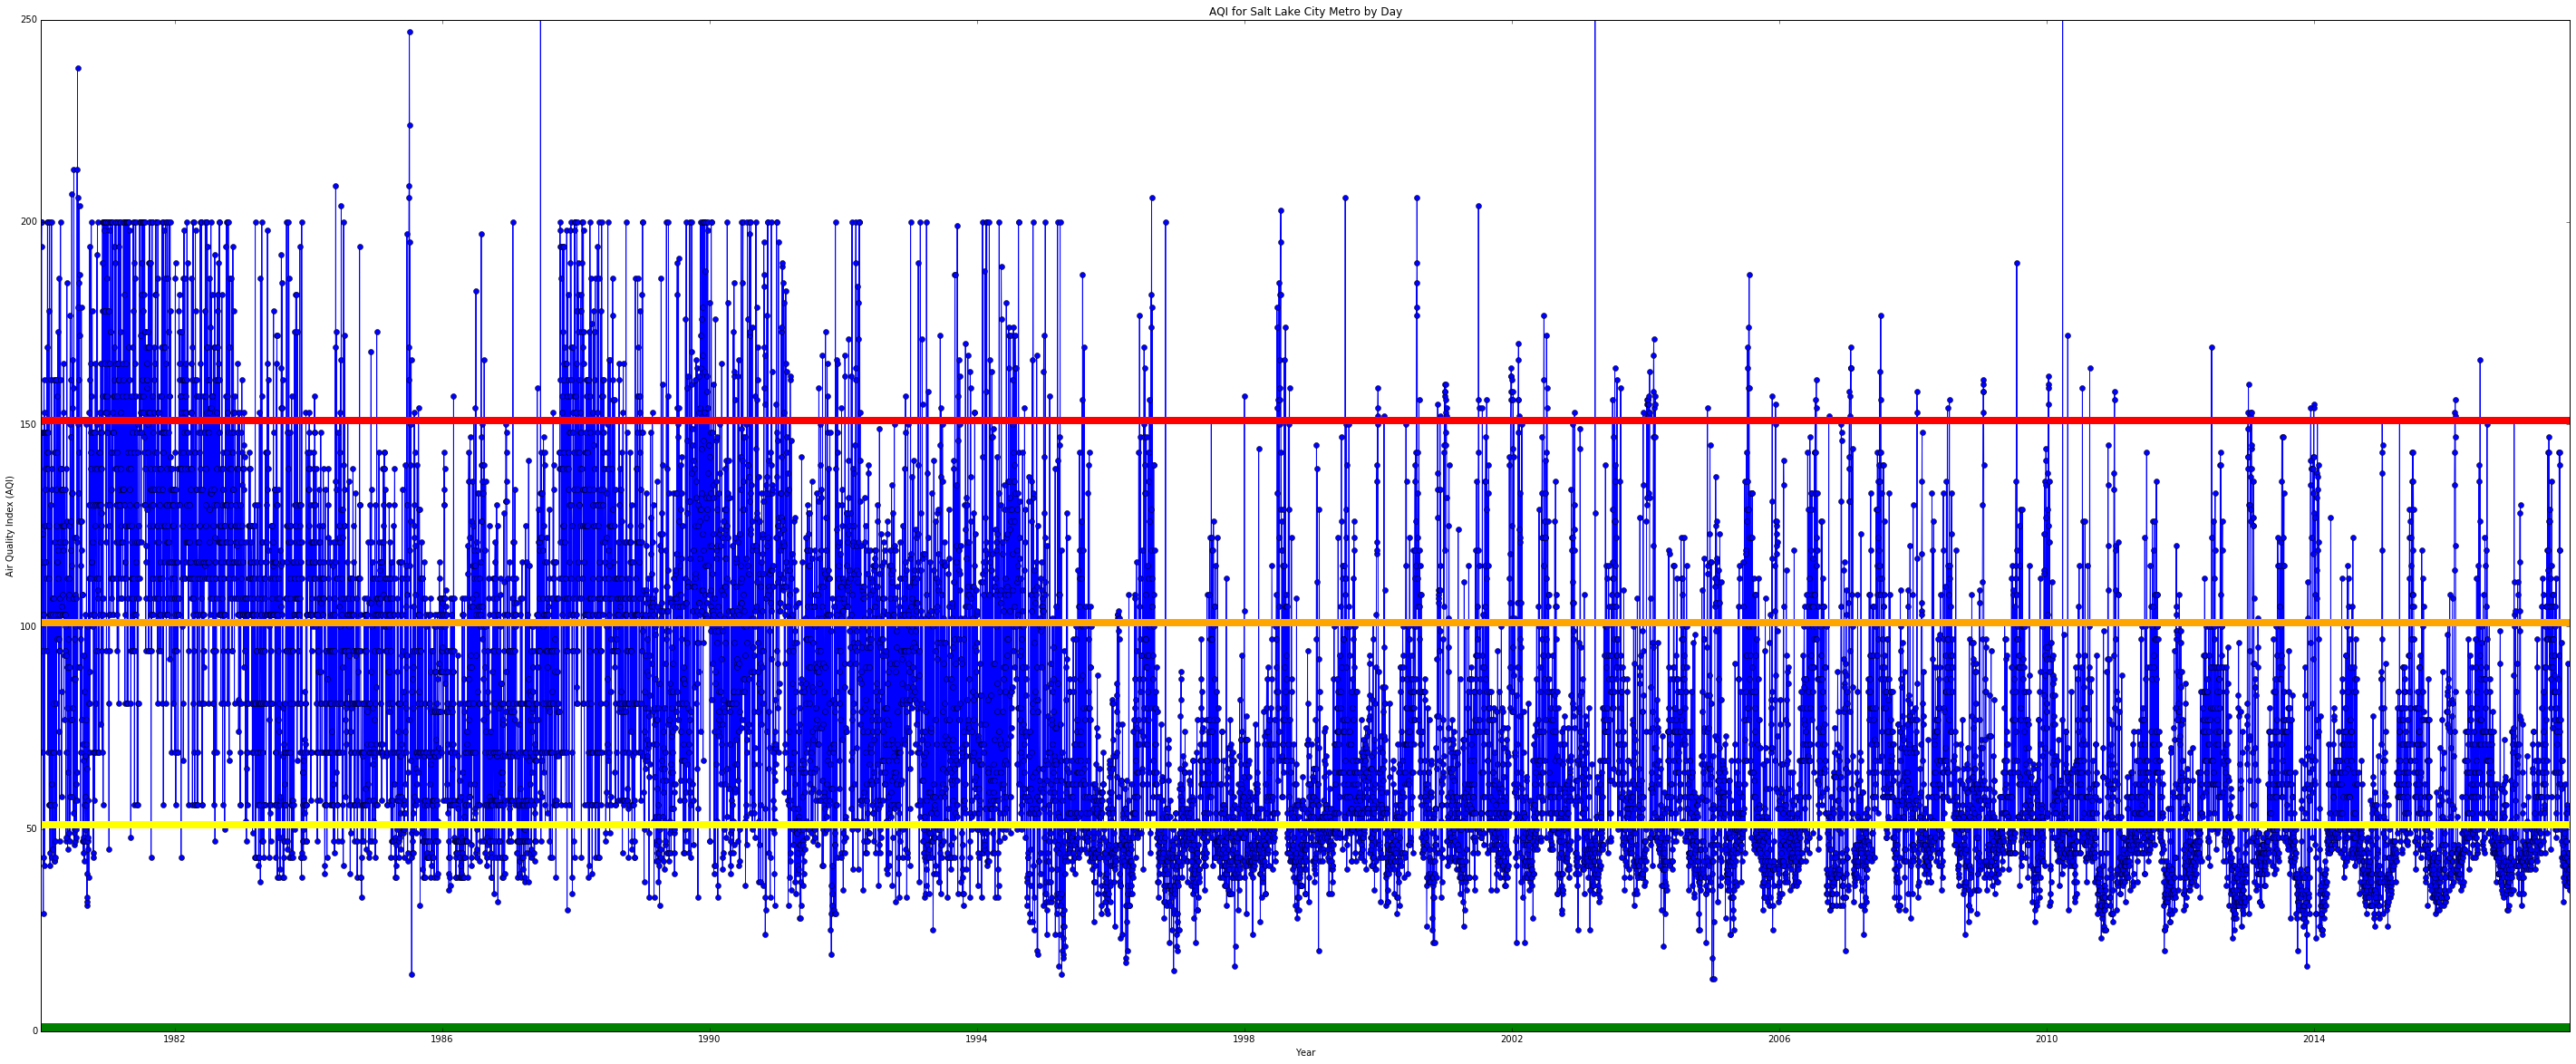

In [22]:
#create a simple daily8 plot to observe distribution of data
plt.figure(figsize=(50,20))
plt.ylim(0, 250)
plt.ylabel('Air Quality Index (AQI)')
plt.xlabel('Year')
plt.title('AQI for Salt Lake City Metro by Day')
plt.plot(aqi_slc.Date, aqi_slc.AQI, marker='o')

#add horizontal markers to indicate change in AQI Category Label
plt.axhline(y=51, linewidth=8, color='#FFFF00')
plt.axhline(y=101, linewidth=8, color='#FFA500')
plt.axhline(y=151, linewidth=8, color='#FF0000')
plt.axhline(y=0, linewidth=18, color='#008000')



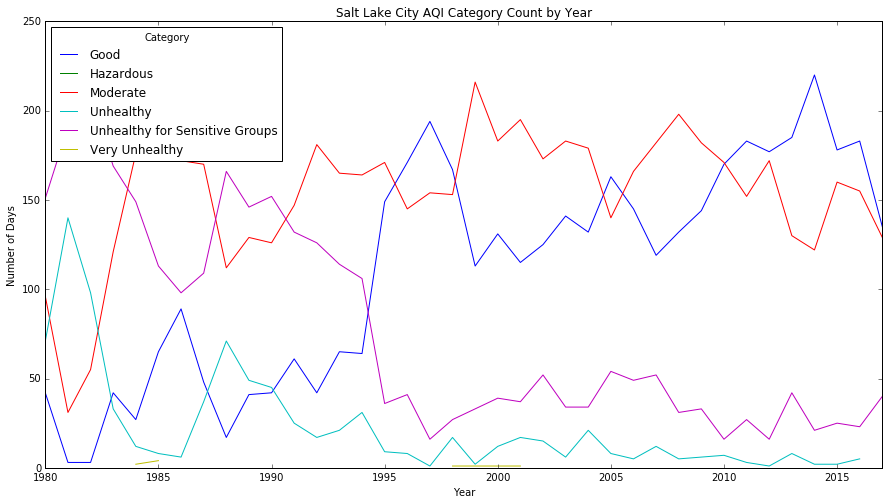

In [24]:
#create a plot to visualize trend of each AQI Category Label over time
fig, ax = plt.subplots(figsize=(15,8))
plt.ylabel('Number of Days')
plt.title('Salt Lake City AQI Category Count by Year')
aqi_slc.groupby(['Year', 'Category']).count()['AQI'].unstack().plot(ax=ax)

In [25]:
#isolate the impact of ozone as a pollutant 
ozone= aqi_slc[aqi_slc['Defining Parameter'].str.contains("Ozone")]

ozone_year= ozone.groupby(['Year'])
ozone_year.describe()

AQI                                                             \
      count        mean        std   min     25%    50%     75%    max   
Year                                                                     
1980  124.0   97.411290  48.532784  29.0   51.00   90.0  126.00  238.0   
1981   11.0  144.727273  35.491100  48.0  143.00  150.0  164.00  182.0   
1982   15.0  142.466667  38.994261  47.0  125.50  154.0  171.50  192.0   
1983   36.0   99.388889  51.357725  37.0   48.00   90.0  154.00  192.0   
1984   46.0  100.086957  45.600598  33.0   65.75   93.0  129.00  209.0   
1985   79.0   90.481013  50.850929  31.0   50.00   74.0  117.00  247.0   
1986   88.0   88.340909  39.808417  32.0   47.00   90.0  119.00  197.0   
1987   62.0   86.596774  33.703850  37.0   58.75   82.0  118.00  159.0   
1988   33.0  104.818182  39.547799  39.0   80.00  101.0  133.00  177.0   
1989   45.0   86.422222  43.692359  31.0   44.00   77.0  119.00  190.0   
1990   25.0   79.640000  31.419049  37.0   48.00   84.0  100.00  147.0   
1991   70.0   71.514286  33.227256  19.0   45.25   64.0   97.00  159.0   
1992   48.0   74.729167  25.450611  35.0   54.00   71.0   94.00  119.0   
1993   42.0   69.261905  35.203977  25.0   44.50   56.0   84.50  172.0   
1994   67.0  103.880597  36.017051  31.0   75.50  100.0  133.00  172.0   
1995  124.0   70.491935  30.480300  39.0   48.00   61.0   84.00  187.0   
1996  127.0   87.322835  37.391936  33.0   58.00   80.0  106.50  206.0   
1997  124.0   64.419355  24.394487  31.0   47.00   58.0   77.00  151.0   
1998  135.0   86.888889  41.372474  40.0   51.00   74.0  106.50  203.0   
1999  130.0   76.453846  27.915185  40.0   54.00   71.0   90.00  206.0   
2000  131.0   83.106870  34.347601  36.0   58.00   77.0  100.00  206.0   
2001  126.0   79.150794  31.161532  35.0   54.00   74.0   92.25  204.0   
2002  125.0   78.352000  33.693652  34.0   50.00   67.0  100.00  177.0   
2003  134.0   81.074627  29.333352  35.0   58.00   78.5   97.00  164.0   
2004  127.0   69.976378  22.439147  33.0   49.50   67.0   87.00  122.0   
2005  117.0   76.632479  35.857140  36.0   48.00   64.0  100.00  187.0   
2006  159.0   76.924528  32.596021  31.0   48.00   71.0  100.50  161.0   
2007  138.0   81.144928  31.641595  28.0   58.00   80.0  104.00  177.0   
2008  138.0   67.978261  27.450145  31.0   46.00   64.0   84.00  156.0   
2009  138.0   64.956522  24.901813  27.0   46.00   56.0   84.00  136.0   
2010  181.0   54.939227  22.192132  23.0   43.00   48.0   64.00  164.0   
2011  210.0   59.304762  22.185440  29.0   45.25   51.0   67.00  143.0   
2012  211.0   64.075829  26.294014  26.0   44.00   58.0   82.00  169.0   
2013  220.0   56.272727  22.718009  28.0   42.00   48.0   64.00  147.0   
2014  244.0   53.786885  18.548670  25.0   43.00   49.0   61.75  127.0   
2015  253.0   60.873518  24.660227  29.0   42.00   54.0   74.00  143.0   
2016  258.0   58.062016  22.347190  30.0   43.00   49.0   67.00  166.0   
2017  244.0   63.868852  27.147047  31.0   44.00   51.0   80.00  147.0   

     CBSA Code           ...                    Number of Sites Reporting  \
         count     mean  ...       75%      max                     count   
Year                     ...                                                
1980     124.0  41620.0  ...   41620.0  41620.0                     124.0   
1981      11.0  41620.0  ...   41620.0  41620.0                      11.0   
1982      15.0  41620.0  ...   41620.0  41620.0                      15.0   
1983      36.0  41620.0  ...   41620.0  41620.0                      36.0   
1984      46.0  41620.0  ...   41620.0  41620.0                      46.0   
1985      79.0  41620.0  ...   41620.0  41620.0                      79.0   
1986      88.0  41620.0  ...   41620.0  41620.0                      88.0   
1987      62.0  41620.0  ...   41620.0  41620.0                      62.0   
1988      33.0  41620.0  ...   41620.0  41620.0                      33.0   
1989      45.0  41620.0  ...   41620.0  41620.0  

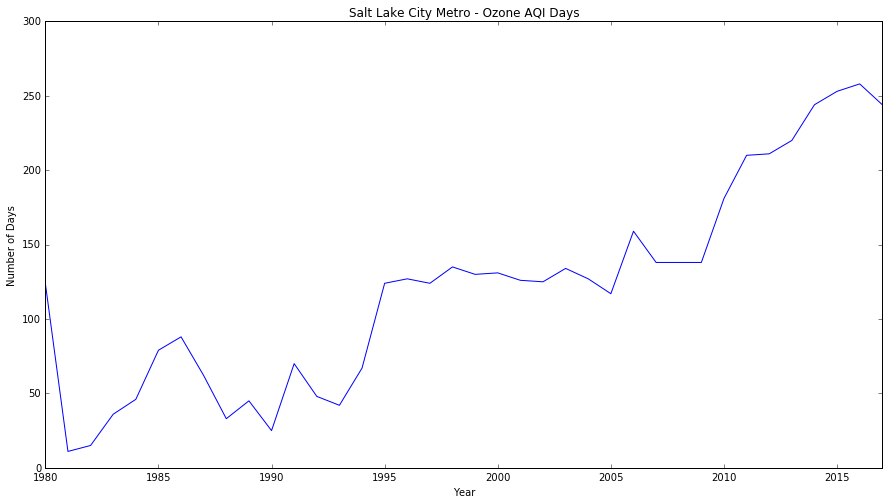

In [26]:
#plot the number of day where ozone was the defining pollutant parameter
plt.ylabel('Number of Days')
ozone_year['AQI'].count().plot(figsize=(15,8),title="Salt Lake City Metro - Ozone AQI Days")